### **Objective**
In this notebook, we will be implementing K-means clustering algorithm.

### **Importing libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

from sklearn.datasets import make_blobs
from scipy.spatial.distance import cdist

### **K-means clustering algorithm** 

It is an iterative algorithm that proceeds as follows :

**Input** :

 * $n$ training examples represented with $m$ features.

 * Number of centroids: $k$.

In [2]:
cluster_count = 3

In [3]:
X, y = make_blobs(n_samples=100, n_features=2, centers=3, random_state=1)
X.shape ,y.shape

((100, 2), (100,))

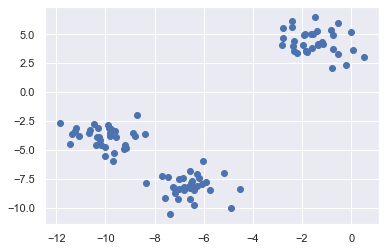

In [4]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [5]:
np.random.seed(1234)
centroids = X[np.random.randint(0,X.shape[0],size=3)] 

# labels = np.argmin(cdist(X,centroids), axis=1)
labels = cdist(X,centroids)[:5]

print(labels)
np.argmin(labels,axis=1)

[[ 1.60060758 10.13570072 11.50885115]
 [12.44397113  4.57170773  1.05840646]
 [14.10664358  6.79245429  1.26710263]
 [12.01729549  6.00474853  1.42643018]
 [12.48439433  1.49590155  6.8274392 ]]


array([0, 2, 2, 2, 1], dtype=int64)

In [6]:
np.random.seed(1234)

print(X[6])
print(np.random.randint(0, 10, 3))

X[np.random.randint(0, 10, 3)]
X[[3, 6, 5]]

[-6.38481234 -8.4730297 ]
[3 6 5]


array([[-9.76761777, -3.19133737],
       [-6.38481234, -8.4730297 ],
       [-6.26302115, -8.10666081]])

### **Algorithm** :
1. Randomly initialize k centroids. Note that each centroid is a vector in $m$ dimensional space.

2. Repeat until convergence:
   
      a. Assign points to the closest centroids.

      b. Calculate the centroids based on the points assigned to the cluster.

The algorithm converges when the centroid stops changing or in other words the cluster memebership stabilizes and subsequent iterations do not yield any changes.

In [7]:
def fit(X, k):
    # take three random points from data set and take them as initial centroids
    centroids = X[np.random.randint(0, X.shape[0], size=k)]

    # calculate initial label of each data point
    labels = np.argmin(cdist(X, centroids), axis=1)

    for _iteration in range(10):
        # copy labels for all points for comparision later
        previous_labels = labels.copy()

        # compute new centroids
        centroids = np.array([np.mean(X[labels == r], axis=0) for r in range(k)])

        # at last recalculate label of each data point
        labels = np.argmin(cdist(X, centroids), axis=1)

        # check if labels of points are not changing
        if all(labels==previous_labels): 
            break

    return centroids, labels

In [8]:
centroids , labels = fit(X ,cluster_count)

In [9]:
print('Centroids : \n',centroids) 

Centroids : 
 [[-8.31566014 -6.01596717]
 [-1.33824945  3.58202335]
 [-1.63933544  5.29379975]]


### **Visualization**

Let's visualize cluster centers as obtained through k-means clustering algorithm.

In [10]:
def plot_kmeans(X,centroids, labels, rseed=0, ax=None):

    # plot input data
    ax = ax or plt.gca() 
    ax.axis('equal') 

    # plot data points
    ax.scatter(X[:,0],X[:,1],c=labels, s=40, cmap='plasma', zorder=2)

    # plot the representation of the KMeans model.
    radii = [cdist(X[labels==i],[center]).max() for i, center in enumerate(centroids)] 

    for c,r in zip(centroids, radii):
    # add circular shapes to the clusters
        ax.add_patch(plt.Circle(c,r, fc='#CCCCCC',lw =5, alpha=0.5,zorder=1))               

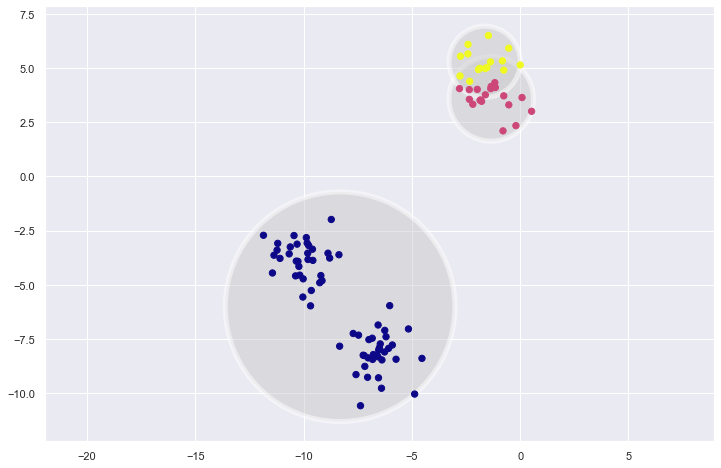

In [11]:
plt.figure(figsize=(12,8)) 
plot_kmeans(X ,centroids, labels)